# Data Importing

In [138]:
#Import Package
import pandas as pd
import numpy as np
import pandas_profiling as pp
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
data = pd.read_csv("datasets_245550_518431_train-data.csv")

# Data Understanding

In [140]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Bottom five rows data

In [141]:
data.tail(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [142]:
#shape of data
data.shape

(6019, 14)

# There are total 6019 rows and 13 attributes

In [143]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


In [145]:
data.size

84266

In [146]:
# Check datatype of each attribute
data.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [147]:
data.get_dtype_counts()

float64    2
int64      3
object     9
dtype: int64

In [148]:
data.count()

Unnamed: 0           6019
Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
New_Price             824
Price                6019
dtype: int64

In [149]:
pp.ProfileReport(data)

Number of variables,14
Number of observations,6019
Total Missing (%),6.3%
Total size in memory,658.4 KiB
Average record size in memory,112.0 B
Numeric,5
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# CLEANING DATASET AND MISSING VALUES

### Number of null row in columns

In [150]:
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Percentage of data missing

In [151]:
(data.isnull().sum()/len(data))*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

### Renaming column of dataset

In [152]:
data = data.rename(columns={'Unnamed: 0': 'id'})

In [153]:
data.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### Seats Column

In [154]:
data.groupby('Seats')['id'].nunique()

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: id, dtype: int64

In [155]:
data['Seats'].median()

5.0

In [156]:
data['Seats'].fillna(value = 5.0, inplace=True)

In [157]:
data.Seats[data.Seats == 0.0]=5.0
data.isna().sum()

C:\Users\SHANU SHARMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Mileage Column

In [158]:
data.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl       68
10.0 kmpl      10
10.1 kmpl       7
10.13 kmpl      3
10.2 kmpl       6
10.37 kmpl      2
10.4 kmpl       3
10.5 kmpl      21
10.6 kmpl       1
10.8 kmpl      10
10.9 kmpl       7
10.91 kmpl     15
10.93 kmpl      6
10.98 kmpl      1
11.0 kmpl      17
11.05 kmpl      2
11.07 kmpl      1
11.1 kmpl      10
11.18 kmpl     10
11.2 kmpl       5
11.25 kmpl      2
11.3 kmpl      12
11.33 kmpl      6
11.36 kmpl     23
11.4 kmpl       6
11.49 kmpl      2
11.5 kmpl      41
11.56 kmpl      1
11.57 kmpl      9
11.62 kmpl      1
               ..
28.09 kmpl     28
28.4 kmpl      40
30.46 km/kg     1
31.79 km/kg     2
32.26 km/kg     2
33.44 km/kg     4
33.54 km/kg     5
6.4 kmpl        1
7.5 kmpl        1
7.81 kmpl       1
7.94 kmpl       2
8.0 kmpl        1
8.1 kmpl        1
8.2 kmpl        2
8.3 kmpl        1
8.45 kmpl       1
8.5 kmpl        1
8.6 kmpl        2
8.7 kmpl        3
8.77 kmpl       1
9.0 kmpl        6
9.1 kmpl        1
9.3 kmpl        2
9.43 kmpl       2
9.

#### Removing the string part and converting to float, taking median and will replace empty rows with median

In [159]:
data.Mileage[data.Mileage == '0.0kmpl']=np.nan
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)',r'\1',str(x)))
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'].median()

C:\Users\SHANU SHARMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


18.15

In [160]:
data['Mileage'].fillna(value=18.15, inplace=True)
data.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

## Engine Column

In [161]:
data.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
1172 CC      3
1186 CC     14
1193 CC     23
1194 CC      3
1196 CC     50
1197 CC    606
1198 CC    227
1199 CC    143
1242 CC      2
1248 CC    512
1298 CC     39
1299 CC     10
1341 CC      9
1343 CC      4
1364 CC     47
1368 CC     10
1373 CC     47
1388 CC      9
1390 CC      4
1395 CC      3
1396 CC    139
1399 CC     88
1405 CC     19
1422 CC      1
1461 CC    152
          ... 
2996 CC      6
2997 CC      2
2999 CC      1
3197 CC      1
3198 CC     15
3200 CC      1
3436 CC      2
3498 CC     12
3597 CC      2
4134 CC      8
4367 CC      5
4395 CC      3
4806 CC      4
4951 CC      1
5000 CC      2
5204 CC      1
5461 CC      3
5998 CC      1
624 CC      25
72 CC        1
793 CC       4
796 CC     129
799 CC      36
814 CC      59
936 CC      21
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

### Removing the string part and converting to float, taking mode and will replace empty row with median

In [162]:
data['Engine'] = data['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
data['Engine'] = data['Engine'].astype(float)
data['Engine'].median()

1493.0

In [163]:
data['Engine'].fillna(value=1493.0,inplace=True)
data.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Power Column

In [164]:
data['Power'] = data['Power'].str.split(" ").str[0]
data.Power[data.Power=='null']=np.NaN
data['Power'].isnull().sum()

C:\Users\SHANU SHARMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


143

In [165]:
data['Power'] = data['Power'].astype(float)
data['Power'].median()

97.7

In [166]:
data['Power'].fillna(value=91.1,inplace=True)
data.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Name Column

In [167]:
data['Name'] = data['Name'].str.split(' ').str[0]
data.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

In [168]:
data.Name[data.Name=='ISUZU']='Isuzu'

C:\Users\SHANU SHARMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### deleting new price column because there are lot of missing values in it

In [169]:
del data['New_Price']

### This data is for visualisation with clean dataset

In [170]:
dataset=data.copy()

In [171]:
del data['id']

In [172]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

## Converting datatypes from int to float

In [173]:
data['Year'] = data['Year'].astype(float)

In [174]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(float)

In [175]:
data.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

# Data Visualisation

### Year wise Count

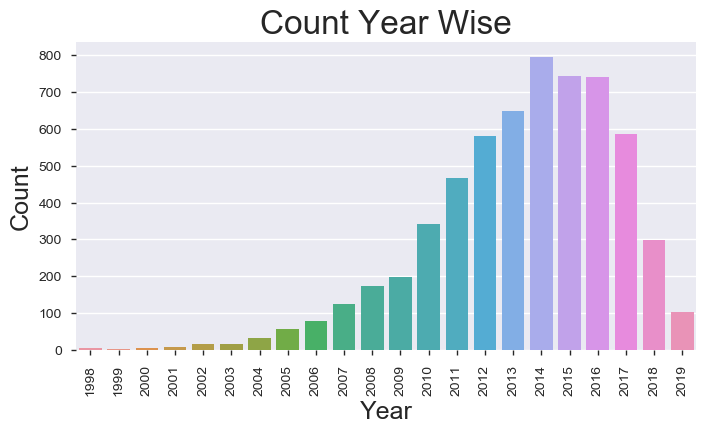

In [176]:
plt.figure(figsize=(8,4))
sns.countplot(dataset['Year'])
plt.xticks(rotation=90)
plt.title('Count Year Wise', size=24)
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)
plt.show()

### Fuel types count

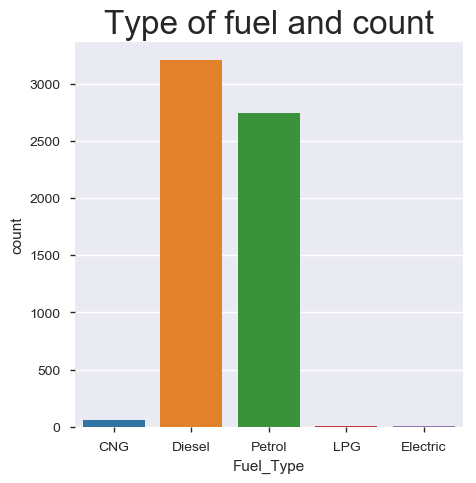

In [177]:
plt.figure(figsize=(5,5))
sns.countplot(dataset['Fuel_Type'])
plt.title('Type of fuel and count', size=24)
plt.show()

### Location graph and percentage

In [178]:
color=['#FF8C73','#66b3ff','#99ff99','#CA8BCA', '#FFB973', '#89DF38', '#8BA4CA', '#ffcc99', 
          '#72A047', '#3052AF', '#FFC4C4']

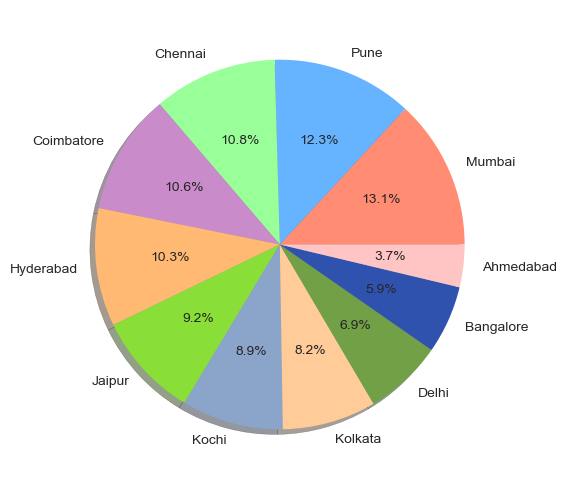

In [179]:
plt.figure(figsize=(6,6))
plt.pie(dataset['Location'].value_counts(),autopct='%1.1f%%',labels=dataset['Location'].unique(),colors=color,shadow=True)
plt.show()

### Types of Transmission and Count

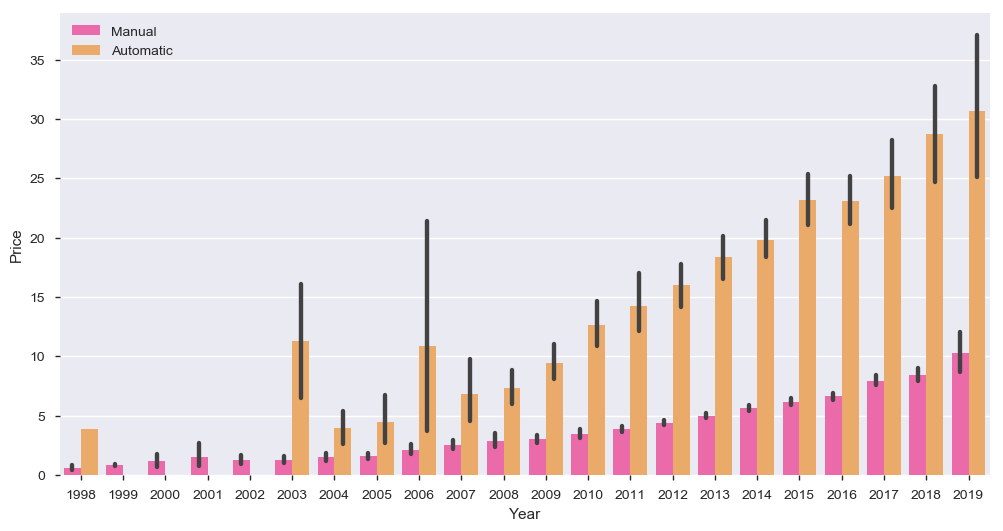

In [183]:
plt.figure(figsize=(12,6))
sns.barplot(x=dataset['Year'],y=dataset['Price'],hue=data['Transmission'],palette='spring')
plt.legend(loc='upper left')
plt.show()

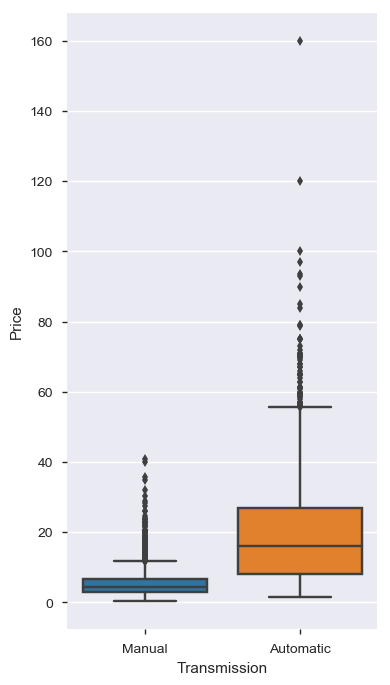

In [181]:
plt.figure(figsize=(4,8))
sns.boxplot(x=dataset['Transmission'],y=dataset['Price'])
plt.show()

In [182]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.321534,-0.050086,0.028542,0.014829,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.090890,0.031494,0.083828,-0.011493
Mileage,0.321534,-0.065253,1.000000,-0.586404,-0.493500,-0.302424,-0.306588
Engine,-0.050086,0.090890,-0.586404,1.000000,0.860535,0.397490,0.657347
Power,0.028542,0.031494,-0.493500,0.860535,1.000000,0.103325,0.770260
Seats,0.014829,0.083828,-0.302424,0.397490,0.103325,1.000000,0.053787
Price,0.305327,-0.011493,-0.306588,0.657347,0.770260,0.053787,1.000000
